In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [220]:
mouse = '4139224.2'
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

df_mouse = df[df['MouseName'].str.match(mouse)]
# df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse

G:\My Drive\VR_Data\TwoTower\behavior.sqlite


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
787,4139224.2,17_10_2018,1,TwoTower_noTimeout,60,1,CA1,2018-10-17,G:\My Drive\VR_Data\TwoTower\4139224.2\17_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\17_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\17_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\17_10_2...
802,4139224.2,18_10_2018,2,TwoTower_noTimeout,58,1,CA1,2018-10-18,G:\My Drive\VR_Data\TwoTower\4139224.2\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\18_10_2...
826,4139224.2,19_10_2018,2,TwoTower_noTimeout,60,1,CA1,2018-10-19,G:\My Drive\VR_Data\TwoTower\4139224.2\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\19_10_2...
859,4139224.2,22_10_2018,1,TwoTower_Timeout,40,1,CA1,2018-10-22,G:\My Drive\VR_Data\TwoTower\4139224.2\22_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\22_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\22_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\22_10_2...
906,4139224.2,25_10_2018,1,TwoTower_Timeout,57,1,CA1,2018-10-25,G:\My Drive\VR_Data\TwoTower\4139224.2\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\25_10_2...
943,4139224.2,27_10_2018,3,TwoTower_Timeout,68,1,CA1,2018-10-27,G:\My Drive\VR_Data\TwoTower\4139224.2\27_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\27_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\27_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\27_10_2...
956,4139224.2,29_10_2018,2,TwoTower_Timeout,60,1,CA1,2018-10-29,G:\My Drive\VR_Data\TwoTower\4139224.2\29_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\29_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\29_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\29_10_2...
979,4139224.2,31_10_2018,2,TwoTower_Timeout,70,1,CA1,2018-10-31,G:\My Drive\VR_Data\TwoTower\4139224.2\31_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\31_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\31_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\31_10_2...
990,4139224.2,01_11_2018,1,TwoTower_Timeout,74,1,CA1,2018-11-01,G:\My Drive\VR_Data\TwoTower\4139224.2\01_11_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\01_11_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\01_11_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\01_11_2...
997,4139224.2,02_11_2018,1,TwoTower_Timeout,65,1,CA1,2018-11-02,G:\My Drive\VR_Data\TwoTower\4139224.2\02_11_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\02_11_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\02_11_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\02_11_2...


In [238]:
sess = df_mouse.iloc[-1]
print(sess['data file'])

G:\My Drive\VR_Data\TwoTower\4139224.2\02_11_2018\TwoTower_Timeout_1.sqlite


In [239]:
VRDat,C, S, A = pp.load_scan_sess(sess)
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)


num aberrant ttls 0.0
(27943,) (27943, 20) 90302


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:279: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [240]:
S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,bin_size=20,speed=VRDat.speed._values)
S_trial_mat[np.isnan(S_trial_mat)]=0


In [241]:
print(S.shape)
print(np.sum(np.isnan(S)))
print(S_trial_mat.shape)

(27943, 1885)
3879330
(89, 23, 1885)


In [242]:
effMorph = trial_info['morphs'] +  trial_info['wallJitter'] + trial_info['bckgndJitter']
msort = np.argsort(effMorph)


In [243]:
S_pc = S_trial_mat[:,:,:]
# nanmask = 1-np.isnan(S_pc)

In [244]:
# S_tmat = sp.stats.zscore(np.reshape(S_pc,[S_trial_mat.shape[0],-1]),axis=-1)
S_tmat = np.reshape(S_pc,[S_trial_mat.shape[0],-1])
S_tmat = S_tmat/np.linalg.norm(S_tmat,ord=2,axis=-1)[:,np.newaxis]
# nanmask = np.reshape(nanmask,[S_trial_mat.shape[0],-1])

In [245]:
S_t_rmat = np.matmul(S_tmat,S_tmat.T) #/np.matmul(nanmask,nanmask.T)

In [246]:
print(S_t_rmat.shape)
print(S_t_rmat)

(89, 89)
[[1.         0.27945692 0.22233129 ... 0.22106351 0.22411979 0.24616872]
 [0.27945692 1.         0.1895909  ... 0.15837777 0.24749732 0.19582018]
 [0.22233129 0.1895909  1.         ... 0.22796661 0.17318814 0.35095835]
 ...
 [0.22106351 0.15837777 0.22796661 ... 1.         0.1814633  0.24879608]
 [0.22411979 0.24749732 0.17318814 ... 0.1814633  1.         0.17693124]
 [0.24616872 0.19582018 0.35095835 ... 0.24879608 0.17693124 1.        ]]


In [247]:
import sklearn as sk
import sklearn.cluster as clust


In [248]:
score = []
for c in range(2,10):
    spectclust = clust.SpectralClustering(n_clusters=c,affinity='precomputed')
    labels = spectclust.fit_predict(S_t_rmat)
    
    
#     aggclust = clust.AgglomerativeClustering(n_clusters=c,affinity='cosine',linkage="average")
#     aggclust.fit(S_tmat)
#     s=sk.metrics.silhouette_score(S_tmat,aggclust.labels_,metric='cosine')
    s=sk.metrics.silhouette_score(S_tmat,labels,metric='cosine')
    score.append(np.round(100.*s))
    print(s*100.)
    

c = np.argmax(score)+2
# aggclust = clust.AgglomerativeClustering(n_clusters=c,affinity='cosine',linkage="average")
# aggclust.fit(S_tmat)
spectclust = clust.SpectralClustering(n_clusters=c,affinity='precomputed')
spectclust.fit(S_t_rmat)

6.888756717761714
9.511726322459529
12.054434840621516
14.551832128227785
16.826823187532977
18.496735014450667
20.495355163338377
20.444925212252237


SpectralClustering(affinity='precomputed', assign_labels='kmeans', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=8, n_init=10, n_jobs=None,
          n_neighbors=10, random_state=None)

8


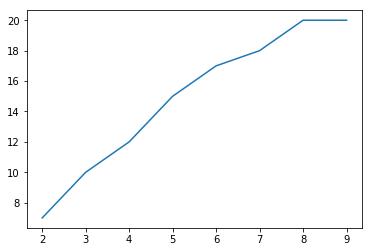

In [249]:
f,ax= plt.subplots()
ax.plot(np.arange(2,10),score)
print(c)

In [250]:
# clustsort = np.argsort(aggclust.labels_)
# clustsort = np.argsort(spectclust.labels_)

# sort clusters by average morph values 
clustmean = np.array([effMorph[spectclust.labels_==i].mean() for i in range(c)])
clusterOrder = np.argsort(clustmean)
labels = np.zeros(effMorph.shape)

for i,cl in enumerate(clusterOrder.tolist()):
    labels[spectclust.labels_==cl]=i
    
clustsort = np.argsort(labels)  


[]

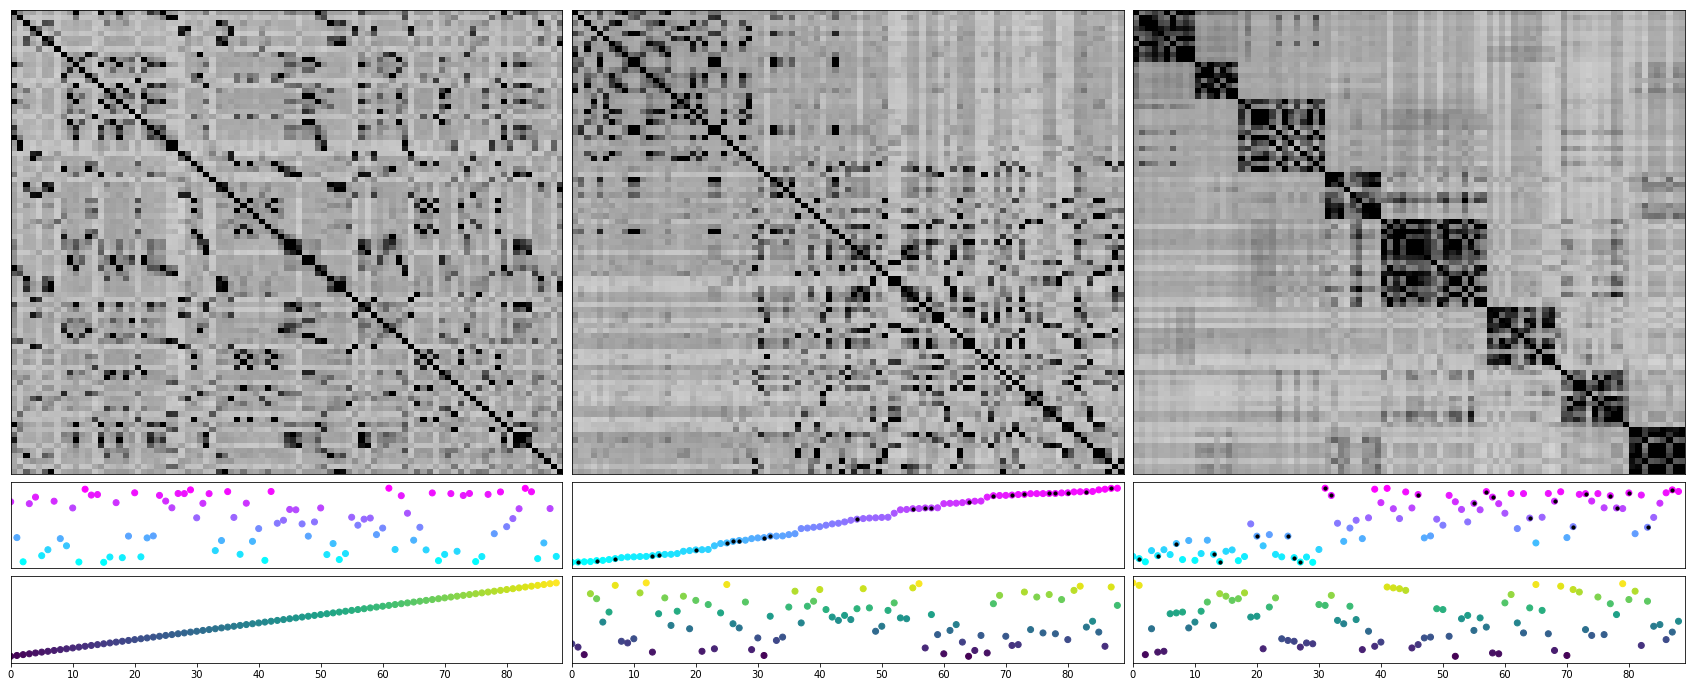

In [251]:
import matplotlib.gridspec as gridspec
f = plt.figure(figsize=[30,12])
gs = gridspec.GridSpec(14,30)
x=np.arange(effMorph.size)
rmask = trial_info['rewards']==0
tnumber = np.arange(x.shape[0])/x.shape[0]
vmax = .5
# f,ax = plt.subplots(2,3,figsize=[20,10],sharex=True)
ax = f.add_subplot(gs[:10,:10])
ax.imshow(S_t_rmat,cmap='Greys',vmin=0,vmax=vmax,aspect='auto')
ax.set_yticks([])
ax.set_xticks([])
ax = f.add_subplot(gs[10:12,:10])
ax.scatter(x,effMorph,c=effMorph,cmap='cool')
ax.set_xlim([0,x.shape[0]])
ax.set_yticks([])
ax.set_xticks([])
ax = f.add_subplot(gs[12:,:10])
ax.scatter(x,tnumber,c=tnumber,cmap='viridis')
ax.set_xlim([0,x.shape[0]])
ax.set_yticks([])
# ax[0,0].imshow(S_t_rmat,cmap='Greys',vmin=0,vmax=.5,aspect='auto')
S_agg_sort = S_t_rmat[clustsort,:]
S_agg_sort = S_agg_sort[:,clustsort]
S_rmat_sort = S_t_rmat[msort,:]
S_rmat_sort = S_rmat_sort[:,msort]


ax = f.add_subplot(gs[:10,10:20])
ax.imshow(S_rmat_sort,cmap='Greys',vmin=0,vmax=vmax,aspect='auto')
ax.set_yticks([])
ax.set_xticks([])
ax = f.add_subplot(gs[10:12,10:20])
ax.scatter(x,effMorph[msort],c=effMorph[msort],cmap='cool')
ax.scatter(x[rmask],effMorph[msort[rmask]],c='black',s=10)
ax.set_xlim([0,x.shape[0]])
ax.set_yticks([])
ax.set_xticks([])
ax = f.add_subplot(gs[12:,10:20])
ax.scatter(x,tnumber[msort],c=tnumber[msort],cmap='viridis')
ax.set_xlim([0,x.shape[0]])
ax.set_yticks([])


ax = f.add_subplot(gs[:10,20:])
ax.imshow(S_agg_sort,cmap='Greys',vmin=0,vmax=vmax,aspect='auto')
ax.set_yticks([])
ax.set_xticks([])
ax = f.add_subplot(gs[10:12,20:])
ax.scatter(x,effMorph[clustsort],c=effMorph[clustsort],cmap='cool')
ax.set_yticks([])
ax.set_xticks([])
# tmpeff = np.copy(effMorph[1:])
# ax.scatter(x[:-1],tmpeff[clustsort[1:]],c=tmpeff[clustsort[1:]],cmap='cool')
ax.scatter(x[rmask],effMorph[clustsort[rmask]],c='black',s=10)
ax.set_xlim([0,x.shape[0]])
ax = f.add_subplot(gs[12:,20:])
ax.scatter(x,tnumber[clustsort],c=tnumber[clustsort],cmap='viridis')
ax.set_xlim([0,x.shape[0]])
ax.set_yticks([])


In [252]:
lem = sk.manifold.SpectralEmbedding(affinity='precomputed',n_components=3)


In [253]:
X = lem.fit_transform(S_t_rmat)

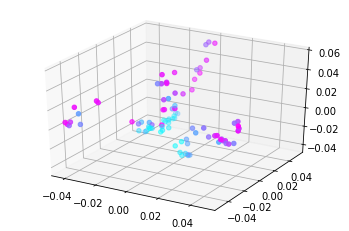

In [254]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=effMorph,cmap='cool')

# f,ax = plt.subplots()
# ax.scatter(X[:,0],X[:,1],c=effMorph,cmap='cool')



In [444]:
S[np.isnan(S)]=0
S_sm = sp.ndimage.filters.gaussian_filter1d(S,3,axis=0)

In [445]:
S_sm_n = S_sm/(np.linalg.norm(S_sm,ord=2,axis=1)[:,np.newaxis]+.001)

In [446]:
print(S_sm_n.shape)

(36583, 1340)


In [447]:
S_cos = np.matmul(S_sm_n,S_sm_n.T)

In [448]:
print(S_cos.shape)

(36583, 36583)


In [449]:
lem = sk.manifold.SpectralEmbedding(affinity='precomputed',n_components=5)
X = lem.fit_transform(S_cos)


C:\Users\mplitt\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [450]:
print(X.shape)

(36583, 5)


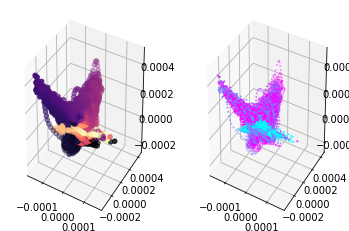

In [451]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
mask = VRDat['pos']._values>0
ax.scatter(X[mask,0],X[mask,1],X[mask,2],c=VRDat['pos']._values[mask],cmap='magma')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X[mask,0],X[mask,1],X[mask,2],c=VRDat['morph']._values[mask],s=1,cmap='cool')
# ax.view_init(10,10)
